<a href="https://colab.research.google.com/github/Tamiim-Iqbal/All-Contest/blob/main/03.%20Classification_2%20-%20Classification%20by%20Extracting%20Features/Classification_2_Classification_by_Extracting_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Excel dataset
df = pd.read_excel("/content/drive/MyDrive/ML Lab/Lab 5/bbc_dataset.xlsx")

# Display first few rows
df.head()

,text,label
0,Ad sales boost Time Warner profit Quarterly pr...,business
1,Dollar gains on Greenspan speech The dollar ha...,business
2,Yukos unit buyer faces loan claim The owners o...,business
3,High fuel prices hit BA's profits British Airw...,business
4,Pernod takeover talk lifts Domecq Shares in UK...,business


Number of samples: 2225
Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']


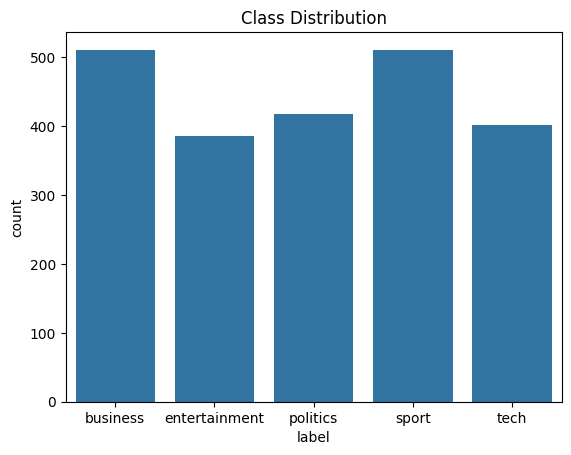

In [ ]:
print("Number of samples:", len(df))
print("Classes:", df['label'].unique())

# Class distribution
sns.countplot(x="label", data=df)
plt.title("Class Distribution")
plt.show()

In [ ]:
import re
from nltk.corpus import stopwords
import nltk   # natural language tool kit
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return " ".join([w for w in text.split() if w not in stop_words])

df["clean_text"] = df["text"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,text,label,clean_text
0,Ad sales boost Time Warner profit Quarterly pr...,business,ad sales boost time warner profit quarterly pr...
1,Dollar gains on Greenspan speech The dollar ha...,business,dollar gains greenspan speech dollar hit highe...
2,Yukos unit buyer faces loan claim The owners o...,business,yukos unit buyer faces loan claim owners embat...
3,High fuel prices hit BA's profits British Airw...,business,high fuel prices hit bas profits british airwa...
4,Pernod takeover talk lifts Domecq Shares in UK...,business,pernod takeover talk lifts domecq shares uk dr...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"])

## Feature Extraction

**Keyword Feature Extraction:** The keyword extraction feature is a form of manual feature engineering in text classification where we select a set of domain-specific words and compute their frequency in each document. Unlike automatic feature extraction methods such as Bag of Words or TF-IDF, which consider all words in the corpus, the keyword feature focuses on important or discriminative words that are strongly associated with particular categories. For example, in news classification, words like "football", "match", or "tournament" are likely indicators of sports articles, while "election", "government", and "policy" point to politics. By explicitly counting these keywords, the model is provided with a strong signal that highlights category-specific terms, which can improve classification performance, especially on smaller datasets. Additionally, keyword features increase interpretability, allowing one to understand why the model associates certain words with a category. When combined with automated features like BoW and TF-IDF, keyword features can help create a hybrid representation that leverages both general vocabulary patterns and domain knowledge.

In [ ]:
# Expanded keyword list across categories
keywords = [
    # Business
    "market", "stock", "bank", "economy", "finance", "trade", "growth",
    # Politics
    "election", "government", "minister", "policy", "parliament", "law",
    # Sport
    "football", "cricket", "tennis", "match", "team", "goal", "tournament",
    # Tech
    "technology", "computer", "internet", "software", "ai", "digital", "innovation",
    # Entertainment
    "film", "music", "movie", "actor", "actress", "award", "theatre"
]

# Function to extract keyword counts
def extract_keyword_features(texts, keywords):
    features = []
    for text in texts:
        words = text.split()
        counts = [words.count(kw) for kw in keywords]
        features.append(counts)
    return np.array(features)

# Generate keyword features
X_train_keywords = extract_keyword_features(X_train, keywords)
X_test_keywords = extract_keyword_features(X_test, keywords)

print("Keyword feature shape:", X_train_keywords.shape)

Keyword feature shape: (1780, 34)


In [ ]:
from collections import Counter

def keyword_frequency_by_label(df, keywords):
    # Initialize counts
    label_keyword_counts = {label: Counter() for label in df["label"].unique()}

    # Count keyword occurrences per label
    for _, row in df.iterrows():
        words = row["clean_text"].split()
        counts = Counter(words)
        for kw in keywords:
            if kw in counts:
                label_keyword_counts[row["label"]][kw] += counts[kw]

    # Convert to DataFrame
    freq_df = pd.DataFrame(label_keyword_counts).fillna(0).astype(int)
    return freq_df

# Run on your dataset
freq_df = keyword_frequency_by_label(df, keywords)

# Show top keyword frequencies per label
print(freq_df.sort_index())

            business  entertainment  politics  sport  tech
actor              1            198         2      0     3
actress            0            158         0      0     0
ai                 0              1         0      2     5
award              4            233         3     17    22
bank             316             13         8      0    22
computer           8              5         3      0   299
cricket            0              0         1      3     0
digital            2             39         1      0   373
economy          352              1        87      0     2
election          34              0       565      1    13
film               9            732         8      1    84
finance           80              3        28      1     2
football          18              7        10    125    13
goal               4              2         4    124    18
government       298             31       644      4    46
growth           384              5        20      0    

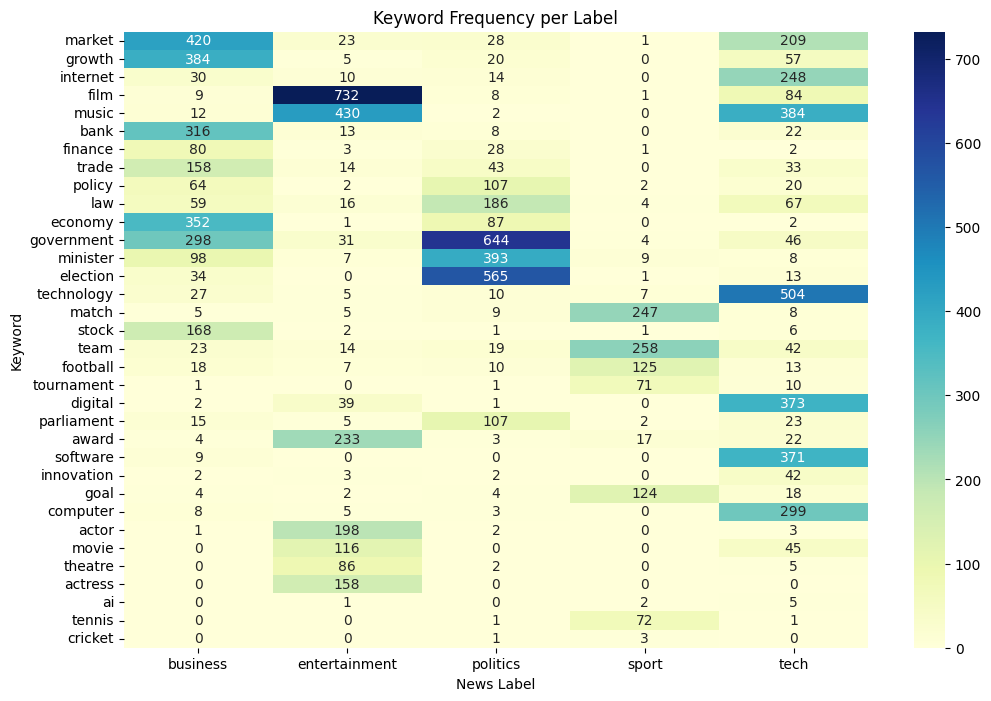

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


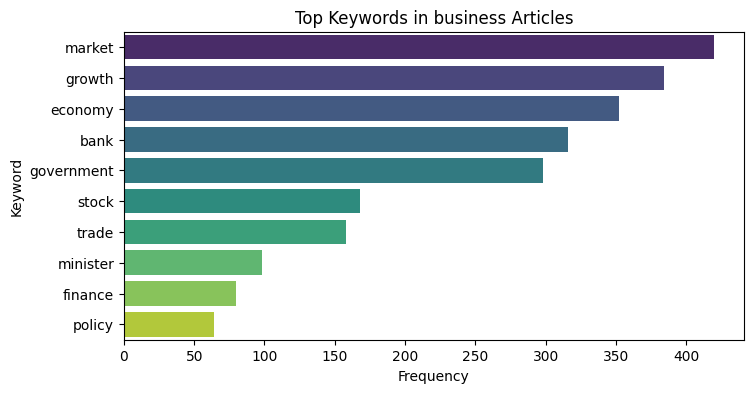

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


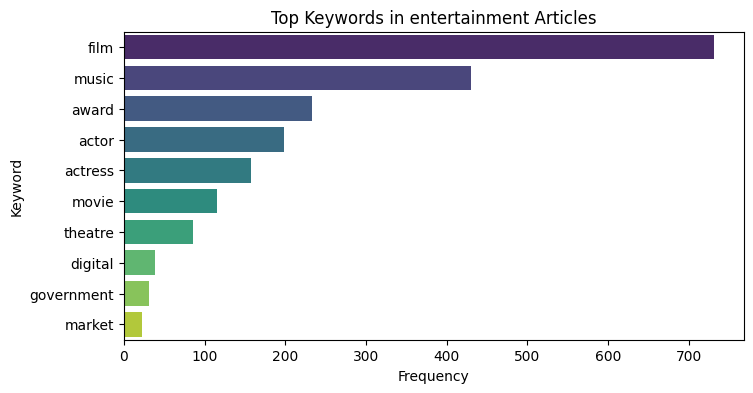

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


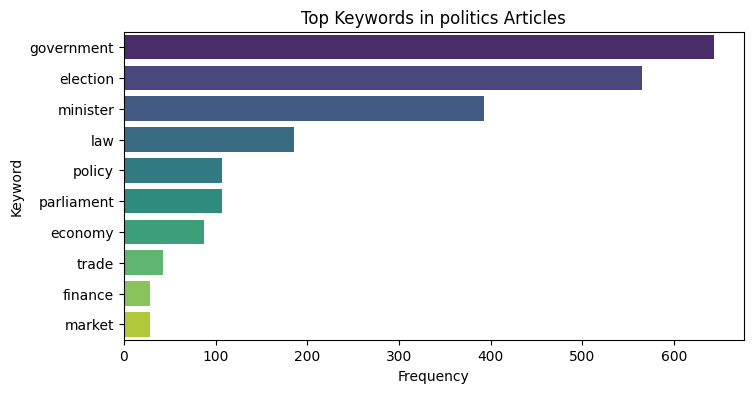

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


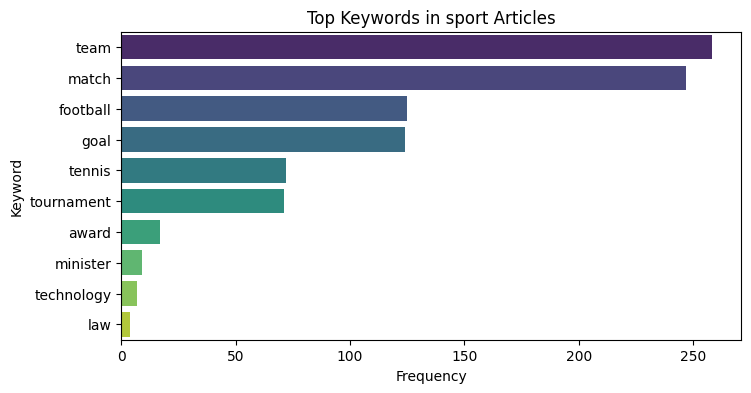

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


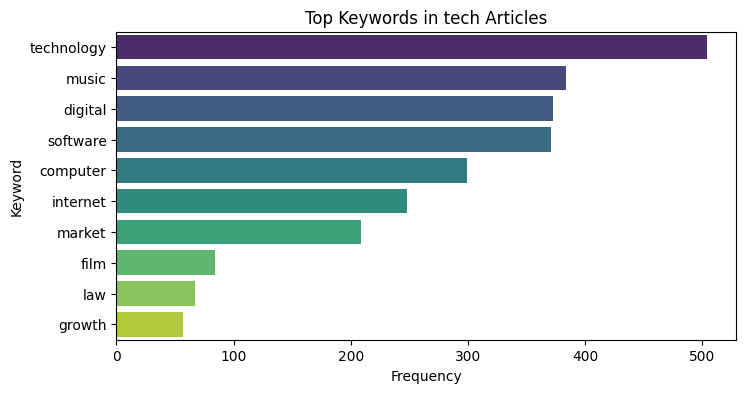

In [ ]:
# -------------------------------
# Heatmap of keyword frequencies
# -------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(freq_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Keyword Frequency per Label")
plt.xlabel("News Label")
plt.ylabel("Keyword")
plt.show()

# -------------------------------
# Bar chart: Top keywords per label
# -------------------------------
for label in df["label"].unique():
    top_keywords = freq_df[label].sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")
    plt.title(f"Top Keywords in {label} Articles")
    plt.xlabel("Frequency")
    plt.ylabel("Keyword")
    plt.show()

In [ ]:
from scipy.sparse import hstack

# Define vectorizers
bow_vectorizer = CountVectorizer(max_features=5000)        # bag of words [single, multiple]
tfidf_vectorizer = TfidfVectorizer(max_features=5000)      #

# Fit and transform BoW + TF-IDF
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Combine (BoW + TF-IDF + Keywords)
X_train_combined = hstack([X_train_bow, X_train_tfidf, X_train_keywords])
X_test_combined = hstack([X_test_bow, X_test_tfidf, X_test_keywords])

print("Final feature shape:", X_train_combined.shape)

Final feature shape: (1780, 10034)



 Training Logistic Regression...
--- Logistic Regression Report ---
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       102
entertainment       0.99      1.00      0.99        77
     politics       0.98      0.96      0.97        84
        sport       0.99      1.00      1.00       102
         tech       1.00      0.96      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



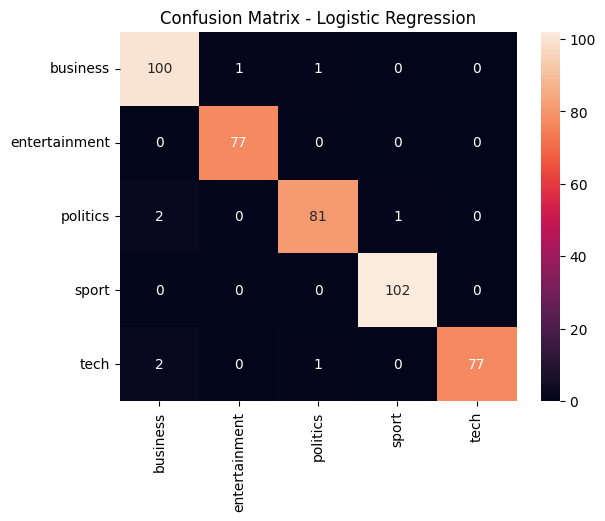


 Training Naive Bayes...
--- Naive Bayes Report ---
               precision    recall  f1-score   support

     business       1.00      0.96      0.98       102
entertainment       1.00      1.00      1.00        77
     politics       0.97      0.99      0.98        84
        sport       1.00      0.99      1.00       102
         tech       0.96      1.00      0.98        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445



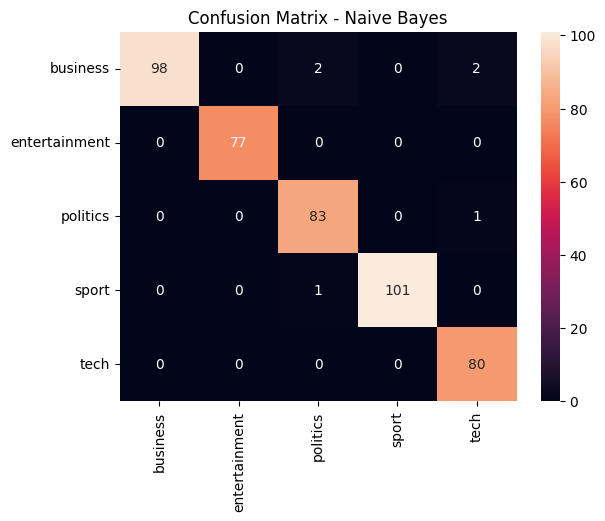


 Training Linear SVM...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--- Linear SVM Report ---
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       102
entertainment       0.97      1.00      0.99        77
     politics       0.98      0.98      0.98        84
        sport       0.99      0.99      0.99       102
         tech       1.00      0.97      0.99        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



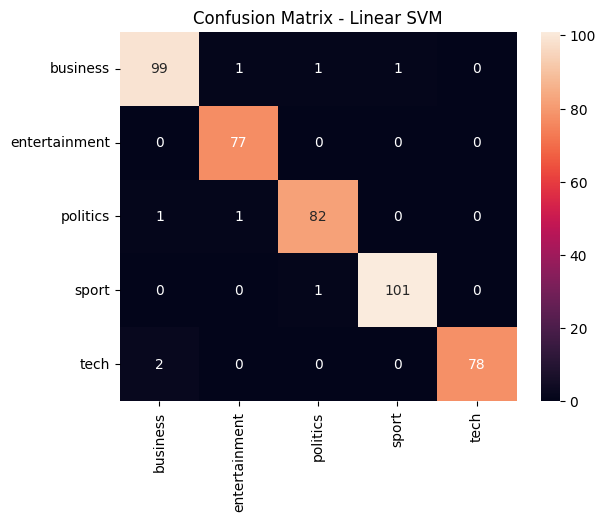


 Training Decision Tree...
--- Decision Tree Report ---
               precision    recall  f1-score   support

     business       0.85      0.81      0.83       102
entertainment       0.88      0.86      0.87        77
     politics       0.76      0.82      0.79        84
        sport       0.88      0.89      0.89       102
         tech       0.88      0.86      0.87        80

     accuracy                           0.85       445
    macro avg       0.85      0.85      0.85       445
 weighted avg       0.85      0.85      0.85       445



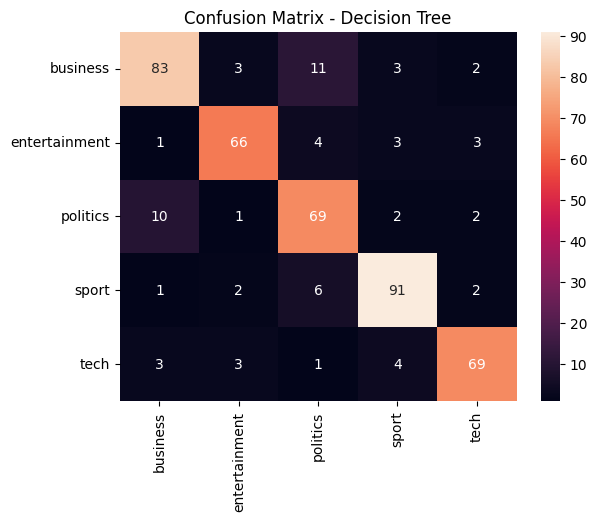


 Training Random Forest...
--- Random Forest Report ---
               precision    recall  f1-score   support

     business       0.93      0.94      0.94       102
entertainment       0.96      0.97      0.97        77
     politics       0.96      0.93      0.95        84
        sport       0.99      1.00      1.00       102
         tech       0.96      0.96      0.96        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



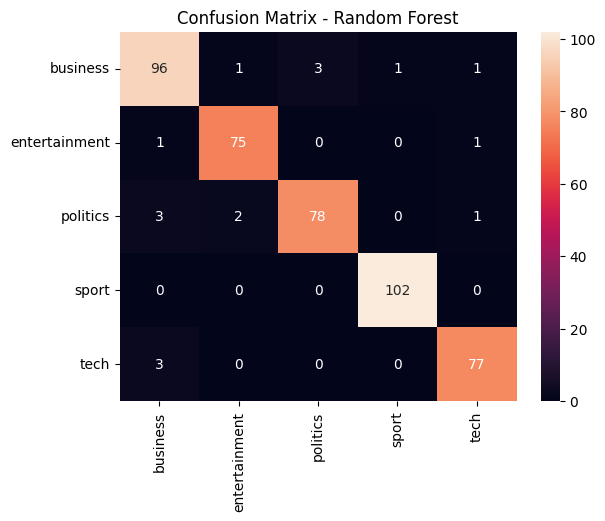

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_combined, y_train)
    preds = model.predict(X_test_combined)

    print(f"--- {name} Report ---")
    print(classification_report(y_test, preds))

    # Store results
    results[name] = classification_report(y_test, preds, output_dict=True)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


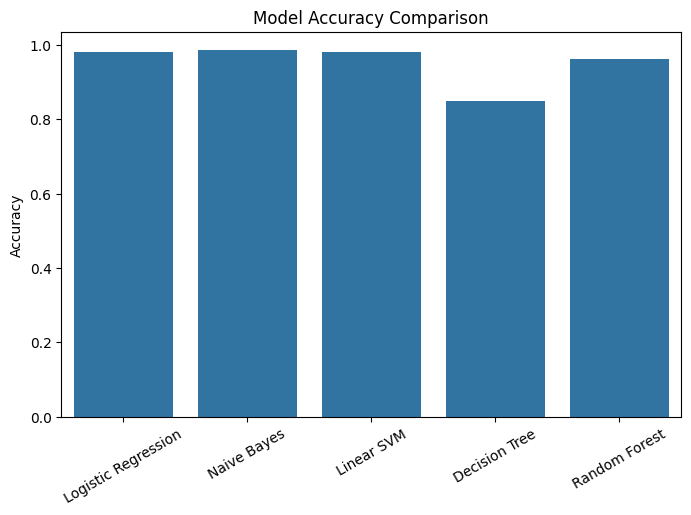

In [ ]:
accuracy_scores = {name: results[name]["accuracy"] for name in results}

plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
print("\nTraining Logistic Regression...")
lr_model.fit(X_train_combined, y_train)
lr_preds = lr_model.predict(X_test_combined)

print("--- Logistic Regression Report ---")
print(classification_report(y_test, lr_preds))


Training Logistic Regression...
--- Logistic Regression Report ---
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       102
entertainment       0.99      1.00      0.99        77
     politics       0.98      0.96      0.97        84
        sport       0.99      1.00      1.00       102
         tech       1.00      0.96      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [ ]:
# --------------------------------
# Predict Category for New Article
# --------------------------------

def predict_news_category(article, model, bow_vectorizer, tfidf_vectorizer, keywords):
    import re
    import numpy as np

    # Preprocess text
    stop_words = set(stopwords.words("english"))
    def clean_text(text):
        text = text.lower()
        text = re.sub(r"[^a-z\s]", "", text)
        return " ".join([w for w in text.split() if w not in stop_words])

    clean_article = clean_text(article)

    # Feature extraction
    # BoW
    bow_feat = bow_vectorizer.transform([clean_article])
    # TF-IDF
    tfidf_feat = tfidf_vectorizer.transform([clean_article])
    # Keyword frequency
    def extract_keyword_features(texts, keywords):
        features = []
        for text in texts:
            words = text.split()
            counts = [words.count(kw) for kw in keywords]
            features.append(counts)
        return np.array(features)

    keyword_feat = extract_keyword_features([clean_article], keywords)

    # Combine features
    from scipy.sparse import hstack
    combined_feat = hstack([bow_feat, tfidf_feat, keyword_feat])

    # Predict
    prediction = model.predict(combined_feat)

    return prediction[0]

# -----------------------------
# Example usage:
# -----------------------------
new_article = ""
predicted_label = predict_news_category(new_article, lr_model, bow_vectorizer, tfidf_vectorizer, keywords)
print(f"Predicted News Category: {predicted_label}")


Predicted News Category: sport


Bangladesh has made notable progress in digital financial transactions but remains far from becoming a cashless economy, experts said yesterday, calling for stronger policy support, improved infrastructure, and wider adoption to reduce reliance on physical currency.

The attackers obtained large amounts of business files, including company names and customer contact details, though Google has indicated that no passwords were stolen in the incident, as per the report.Since then, scammers have reportedly been using the stolen information to contact Gmail users by phone and email in an attempt to gain access to private accounts. Some users have reported receiving fraudulent calls appearing to come from 650 area code numbers, urging them to reset their Gmail passwords. Those who comply risk losing control of their accounts or having personal data taken, as per the report.